In [155]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email='your@email.com'
#search Genbank, returns accession numbers (up to 100)
handle=Entrez.esearch(db='nucleotide', retmax=3, term="rbcl[All Fields]", idtype="acc") 
record = Entrez.read(handle)
print(handle)

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import nltk

df= pd.read_csv("../webmd.csv")
#"C:\Users\52812\"
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df.dropna(subset=df.columns.difference(['Reviews']), how='all')

#Sex
df= df[df.Sex != ' ']
df= df[df.Age != ' ']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331577 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            331577 non-null  object        
 1   Condition      331577 non-null  object        
 2   Date           331577 non-null  datetime64[ns]
 3   Drug           331577 non-null  object        
 4   DrugId         331577 non-null  int64         
 5   EaseofUse      331577 non-null  int64         
 6   Effectiveness  331577 non-null  int64         
 7   Reviews        331545 non-null  object        
 8   Satisfaction   331577 non-null  int64         
 9   Sex            331577 non-null  object        
 10  Sides          331577 non-null  object        
 11  UsefulCount    331577 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 32.9+ MB
None


In [157]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,331577.000000,331577.000000,331577.000000,331577.000000,331577.000000
mean,36079.113072,4.047172,3.541383,3.144938,6.811006
std,51761.458128,1.299587,1.450071,1.608347,9.296080
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9353.000000,5.000000,4.000000,3.000000,4.000000
75%,63164.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,6.000000,6.000000,6.000000,255.000000


In [158]:
df_new= df
df_new= df_new[df_new.Condition != 'Other']
df_new= df_new[df_new.Condition != ' ']
df_new['Condition'].str.lower()
#df_new= df_new.groupby(['Condition']).count()['DrugId'].reset_index()

#for i in df_new.Condition:
#    if "Nose" in i:
#        df_new.Condition[i] = 'Nose'

df_new.Condition = df_new.Condition.apply(lambda x: 'Depression' if 'Depression' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Pressure' if 'Pressure' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Pain' if 'Pain' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Diabetes' if 'Diabetes' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Poison' if 'Poison' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'HIV' if 'HIV' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cold Symptoms' if 'Cold' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cold Symptoms' if 'Flu' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Hiccups' if 'Hiccup' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cancer' if 'Cancer' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Obesity' if 'Obesity' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Infection' if 'Infection' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Inflammation' if 'Inflammation' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Fever' if 'Fever' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Anemia' if 'Anemia' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Hemorrhage' if 'Hemorrhage' in x else x)

df_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
6,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1


In [152]:
df_new.Condition.unique()

df_new_group= df_new.groupby(['Condition']).count()['DrugId'].reset_index()
df_new_group= df_new_group[df_new_group.DrugId > 20]
df_new_group= df_new_group.sort_values(by='DrugId', ascending= False)
df_new_group.head

<bound method NDFrame.head of                                               Condition  DrugId
724                                                Pain   49313
323                                          Depression   22127
786                                            Pressure   22047
553                                           Infection   11509
146                                       Birth Control   11029
...                                                 ...     ...
1045  Too Much Iron in the Blood for a Long Period o...      21
257                                    Coin Shaped Rash      21
38    Acute Blood Clot in a Blood Vessel Supplying t...      21
596                   Locally Advanced Breast Carcinoma      21
598                                Lou Gehrig's Disease      21

[493 rows x 2 columns]>

In [ ]:
#Sorting the age values


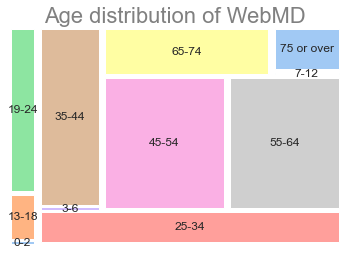

In [8]:
df_age= df.groupby(['Age']).count()['DrugId'].reset_index()

squarify.plot(sizes=df_age['DrugId'], label=df_age['Age'], alpha= 1, pad = 0.2, color = sns.color_palette("pastel"))

plt.text(50, 100, 'Age distribution of WebMD', fontsize = 22, color='grey', horizontalalignment='center',
         verticalalignment='bottom', zorder = 20) 
plt.axis('off')
plt.show()

In [159]:
#Most common conditions by age groups
df_cond= df_new.groupby(['Age', 'Condition']).count()['DrugId'].reset_index()
df_cond= df_cond[df_cond.Condition != 'Other']

Ages = df.Age.unique()

df_cond_top= []
m=  {}

for i in Ages:
    m = df_cond[df_cond.Age == i]
    m = m.sort_values(by='DrugId', ascending= False).head()#.to_string(header=False)
    df_cond_top.append(m)

df_cond_top = pd.concat(df_cond_top)
print(df_cond_top)

             Age                                      Condition  DrugId
5198  75 or over                                       Pressure    1860
5178  75 or over                                           Pain    1738
4990  75 or over                                       Diabetes     557
5092  75 or over                                      Infection     442
4956  75 or over                       Chronic Trouble Sleeping     344
1279       25-34                                           Pain    5545
1041       25-34                                     Depression    4577
946        25-34                                  Birth Control    4482
1168       25-34                                      Infection    1872
932        25-34  Attention Deficit Disorder with Hyperactivity    1279
4444       65-74                                           Pain    5215
4476       65-74                                       Pressure    4551
4218       65-74                                       Diabetes 

In [ ]:
#Bar for unique values
#EaseofUse
print(df.EaseofUse.value_counts())
#Condition
print(df.Condition.value_counts())
#Satisfaction
print(df.Satisfaction.value_counts())
#Drug
print(df.Drug.value_counts())
#Effectiveness
print(df.Effectiveness.value_counts())

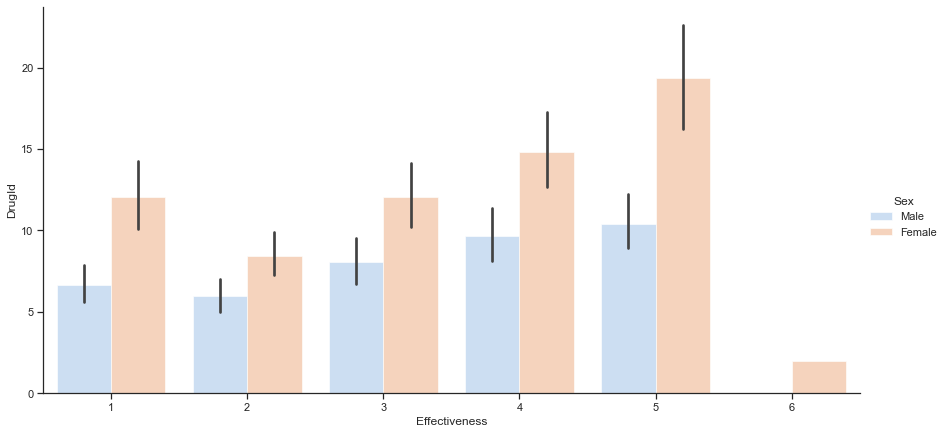

In [11]:
df_cond= df.groupby(['Age', 'Condition', 'Effectiveness', 'Sex']).count()['DrugId'].reset_index()

sns.set_theme(style="ticks", palette="pastel")

sns.catplot(
    data=df_cond , kind="bar",
    x="Effectiveness", y = 'DrugId', hue="Sex", aspect = 2,
    #ci="sd", 
    alpha=.6, height=6, palette = 'pastel'
)

In [16]:
#Heatmap to compare Effectiveness, Satisfaction and Ease of use by Sex

df_heat= df.groupby(['Age', 'Sex']).mean(['Satisfaction', 'Effectiveness', 'EaseofUse']).reset_index()

df_heat.head()

,Age,Sex,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
0,0-2,Female,26859.818815,3.411150,3.268293,2.895470,3.163763
1,0-2,Male,26167.594444,3.605556,3.250000,2.716667,3.027778
2,13-18,Female,49633.913679,3.964350,3.517925,2.895654,4.340477
3,13-18,Male,38314.478158,3.987603,3.442739,3.034238,5.889020
4,19-24,Female,48006.826262,4.058239,3.727549,3.023172,5.361689


In [ ]:
df_sat= df.groupby(['Date', 'Sex']).mean()['Effectiveness'].reset_index()
ax = sns.set(rc={'figure.figsize':(15,10)})

plt.title('Average Price of Avocado by its type 2015-2018')
plt.xticks(rotation =45)
ax = sns.lineplot(x="Date",y="Effectiveness", hue='Sex', data=df_sat)

In [ ]:
x = df.Drug.value_counts()
x

In [ ]:
#Most common conditions
df_drug= df.groupby(['Condition']).count()['DrugId'].reset_index()
df_drug= df_drug[df_drug.Condition != 'Other']
df_drug= df_drug[df_drug.DrugId > 100]
df_drug = df_drug.sort_values(by='DrugId', ascending= False)
#df_drug = df_drug.head(50)
print(df_drug.head(50))

In [ ]:
df.Condition.value_counts()